## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [2]:
your_name = "Mohd Amaan"
your_student_id = "47943734"

In [3]:
# libraries you might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# if you are using google colab with google drive, you could read files from google drive with the following codes
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
#Read data from csv file
df = pd.read_csv('car_sell.csv')

In [5]:
#displaying top 5 records in the dataframe using head()
df.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


 ## Q1. Remove missing data

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [7]:
#Checking if there is any null values using isnull function
df.isnull().sum()

Unnamed: 0         0
name               0
year             310
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64

In [8]:
#Dropping the null values from year column using dropna
df_cleaned = df.dropna()


In [9]:
#Removing the records from fuel column having the value as none
df_cleaned= df_cleaned.drop(df_cleaned.index[df_cleaned.fuel == 'none'])

In [10]:
# Re-checking if there are any null values exising
df_cleaned.isnull().sum()

Unnamed: 0       0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

## Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


In [12]:
##Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner

##1. total number of unique name using unique
unique_name = df_cleaned.name.unique()
print("Total number of unique names: " , len(unique_name))

##2. total number of unique seller_type
unique_seller_type = df_cleaned.seller_type.unique()
print("Total number of unique seller type: " , len(unique_seller_type))

##3.total number of unique transmission
unique_transmission = df_cleaned.transmission.unique()
print("Total number of unique transmission: " , len(unique_transmission))

##4.total number of unique owner
unique_owner = df_cleaned.owner.unique()
print("Total number of unique owner: " , len(unique_owner))

Total number of unique names:  1402
Total number of unique seller type:  3
Total number of unique transmission:  2
Total number of unique owner:  5


In [13]:
#Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
## .describe() function is used to find all the statistical values

km_driven=df_cleaned.groupby('km_driven')
print("the descriptive statistics of km_driven " , km_driven.describe())


the descriptive statistics of km_driven            Unnamed: 0                                                     \
               count         mean          std     min      25%     50%   
km_driven                                                                 
1                1.0  1312.000000          NaN  1312.0  1312.00  1312.0   
101              3.0  1715.000000     1.000000  1714.0  1714.50  1715.0   
1000            13.0  1889.615385  1191.792665   552.0   897.00  2154.0   
1001             2.0  1493.500000   577.706240  1085.0  1289.25  1493.5   
1010             6.0  1777.333333     2.581989  1774.0  1775.50  1777.5   
...              ...          ...          ...     ...      ...     ...   
347089           1.0  3718.000000          NaN  3718.0  3718.00  3718.0   
350000           2.0  1231.500000  1644.023266    69.0   650.25  1231.5   
400000           1.0  3679.000000          NaN  3679.0  3679.00  3679.0   
560000           2.0  2354.500000  2587.303712   525.0  143

In [14]:
# Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
#Using groupby method to perform groupby operation on seller_type

seller_type=df_cleaned.groupby('seller_type')['selling_price']
print("the descriptive statistics of seller_type ")
print(seller_type.agg(['mean', 'std', 'max', 'min']))


the descriptive statistics of seller_type 
                           mean            std      max     min
seller_type                                                    
Dealer            702093.314961  813597.811832  8900000   22000
Individual        421169.410265  420273.684129  4800000   20000
Trustmark Dealer  935797.872340  655724.299195  2600000  315000


In [15]:
# Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type
#Using groupby method to perform groupby operation on owner
owner = df_cleaned.groupby('owner')
print("the descriptive statistics of owner" , owner.describe())



the descriptive statistics of owner                      Unnamed: 0                                             \
                          count         mean          std     min      25%   
owner                                                                        
First Owner              2532.0  2155.984597  1273.098958     0.0  1001.75   
Fourth & Above Owner       67.0  2093.656716  1240.520841    42.0  1140.00   
Second Owner             1000.0  2209.808000  1231.520691     4.0  1243.25   
Test Drive Car             14.0  1979.714286   518.561832  1714.0  1774.25   
Third Owner               273.0  2235.428571  1225.479484    44.0  1297.00   

                                                 year               ...  \
                         50%      75%     max   count         mean  ...   
owner                                                               ...   
First Owner           2165.5  3278.25  4339.0  2532.0  2014.453791  ...   
Fourth & Above Owner  1814.0  3112.50  

## Q3. Plotting and Analysis

Please try to explore the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? Hint: you may use the boxplot function to plot figures for comparison
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you are required to provide an overall summary of your findings from the plots you generated.

In [17]:
df_cleaned.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


Text(0.5, 1.0, 'Boxplot grouped by fuel & selling_price')

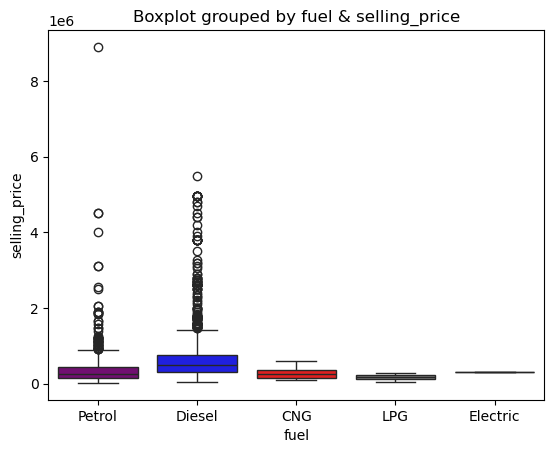

In [18]:
# Q3 -> correlation between fuel and selling_price 
my_colors = {'Petrol': 'purple', 'Diesel': 'blue', 'CNG': 'red', 'LPG':'grey','Electric':'green'}
sns.boxplot(x='fuel', y='selling_price', data=df_cleaned,  palette=my_colors)
plt.title("Boxplot grouped by fuel & selling_price")

Text(0.5, 1.0, 'Boxplot grouped by transmission & selling price')

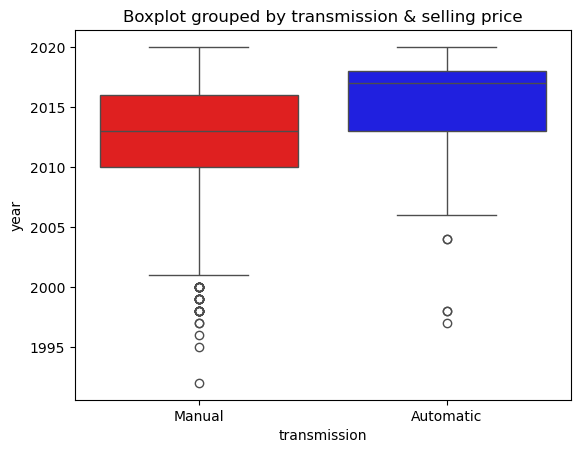

In [19]:
# Q3 -> correlation between transmission and selling price 
my_colors = {'Manual':'red' , 'Automatic':'blue'}
sns.boxplot(x='transmission', y='year', data=df_cleaned,  palette=my_colors)
plt.title("Boxplot grouped by transmission & selling price")

Text(0.5, 1.0, 'Boxplot grouped by transmission & selling price')

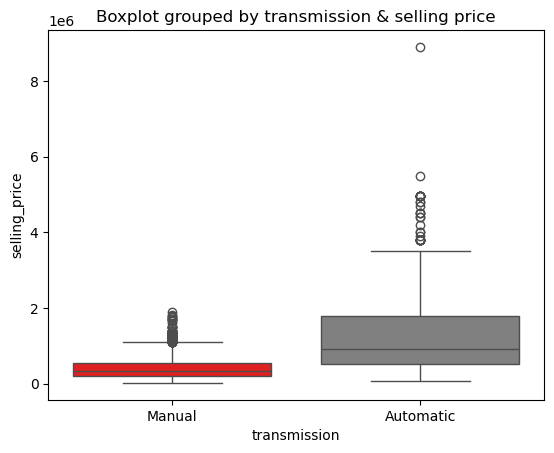

In [20]:
# correlation between transmission and selling price
my_colors = {'Manual':'red' , 'Automatic':'grey'}
sns.boxplot(x='transmission', y='selling_price', data=df_cleaned, palette = my_colors)

plt.title("Boxplot grouped by transmission & selling price")

Text(0.5, 1.0, 'Boxplot grouped by owner & selling price')

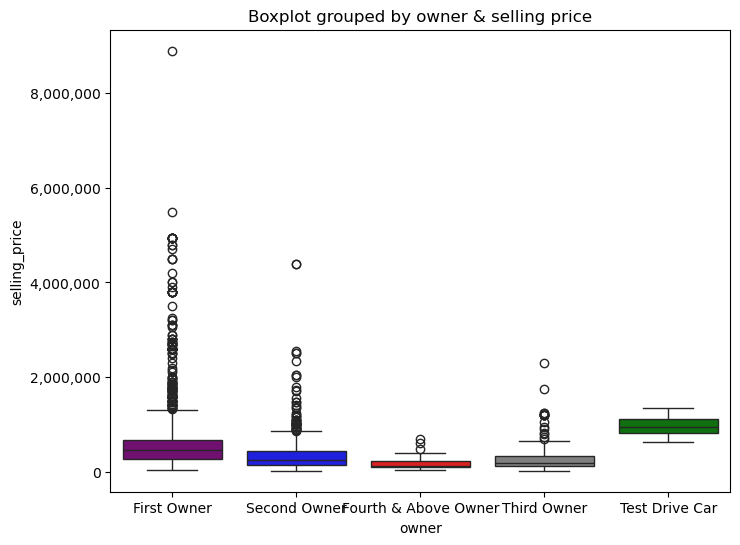

In [21]:
## Q3 -> correlation between owner and selling price 
my_colors = {'First Owner': 'purple', 'Second Owner': 'blue', 'Fourth & Above Owner': 'red', 'Third Owner':'grey','Test Drive Car':'green'}
plt.figure(figsize=(8,6))
sns.boxplot(x='owner', y='selling_price', data=df_cleaned, palette = my_colors)
import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("Boxplot grouped by owner & selling price")

## Q4. Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Please remove the corresponding records in the csv file that is not qualified with the rules. After that, __print the length of the data__.

In [23]:
##Remove outliers:
## 1.owner to be first, second and third owner only
remove_outliers_df = df_cleaned.drop(df_cleaned.index[(df_cleaned.owner=='Fourth & Above Owner')] ) #--> helpfulness is removed 
remove_outliers_df = remove_outliers_df.drop(remove_outliers_df.index[(remove_outliers_df.owner=='Test Drive Car')] )

print("After removing the outliers the length is:",len(remove_outliers_df))



After removing the outliers the length is: 3805


In [24]:
##2.Fuel to be Diesel or Petrol only

remove_outliers_df = remove_outliers_df.drop(remove_outliers_df.index[(remove_outliers_df.fuel=='CNG')] )
remove_outliers_df = remove_outliers_df.drop(remove_outliers_df.index[(remove_outliers_df.fuel=='LPG')] )
remove_outliers_df = remove_outliers_df.drop(remove_outliers_df.index[(remove_outliers_df.fuel=='Electric')] )

print("After removing the outliers the length is:",len(remove_outliers_df))


After removing the outliers the length is: 3751


In [25]:
## 3. Seller_type to be dealer or individual only
remove_outliers_df = remove_outliers_df.drop(remove_outliers_df.index[(remove_outliers_df.seller_type=='Trustmark Dealer')] )
print("After removing the outliers, the length is:",len(remove_outliers_df))



After removing the outliers, the length is: 3657
